## Importing Libs

In [1]:
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
from numpy import genfromtxt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
import matplotlib.pyplot as plt

## Reading, spliting and processing dataset

In [3]:
np.random.seed(42)

In [4]:
dataset = genfromtxt('californiabin.csv', delimiter = ',')

np.random.shuffle(dataset)
split = int(dataset.shape[0] * 0.8)

train = dataset[ : split, : ]
test = dataset[split : -1, : ]

tr_max = train.max(axis = 0, keepdims = True)
tr_min = train.min(axis = 0, keepdims = True)
train = (train - tr_min)/(tr_max - tr_min)
test = (test - tr_min)/(tr_max - tr_min)

## K-folds

In [5]:
# 10 folds

n_folds = 10
n_samples = train.shape[0]
b = 0
s = n_samples // n_folds
o = n_samples % n_folds
tr1 = []
tr2 = []
for i in range(n_folds):
  if o > 0:
    o = o - 1
    te = train[b : b + s + 1]
    tr = np.r_[train[0 : b], train[b + s + 1 : ]]
    b = b + s + 1
  else:
    t_2 = train[b : b + s]
    t_1 = np.r_[train[0 : b], train[b + s : ]]
    b = b + s + 1
  tr1.append(t_1)
  tr2.append(t_2)

## Hyperparameters for grid search

In [6]:
# Hiperparâmetros Candidatos SVM
C = [2 ** x for x in range(-5, 16, 2)]
gamma = [2 ** x for x in range(-15, 4, 2)]

In [7]:
# Hiperparâmetros Candidatos RFC
N = [x for x in range(10, 210, 10)]
max_depth = [4, 6, 8, 10, None]

## Grid search

In [8]:
# Grid Search SVM

score_SVC = []
hiperparams_SVC = []

for c in C:
  for g in gamma:
    score = 0
    for i in range(10):
      svc = SVC(C = c, gamma = g)
      svc.fit((tr1[i])[ : , : -1], (tr1[i])[ : , -1])
      score = score + svc.score((tr2[i])[ : , : -1], (tr2[i])[ : , -1])
    score = score/10
    score_SVC.append(score)
    hiperparams_SVC.append((c, g))

In [9]:
# Grid Search RFC

score_RFC = []
hiperparams_RFC = []
for n in N:
  for m in max_depth:
    score = 0
    for i in range(10):
      rfc = RFC(n_estimators = n, max_depth = m)
      rfc.fit((tr1[i])[ : , : -1], (tr1[i])[ : , -1])
      score = score + rfc.score((tr2[i])[ : , : -1], (tr2[i])[ : , -1])
    score = score/10
    score_RFC.append(score)
    hiperparams_RFC.append((n, m))

In [10]:
# Seleção

idx_SVC = np.argmax(score_SVC)
idx_RFC = np.argmax(score_RFC)

C, G = hiperparams_SVC[idx_SVC]
N, M = hiperparams_RFC[idx_RFC]

print(f" -=-= Hiperparâmetros Selecionados =-=- \n-SVC- \nC: {C}\nGama: {G}\n\n-RFC- \nN: {N}\nM: {M}")

 -=-= Hiperparâmetros Selecionados =-=- 
-SVC- 
C: 32768
Gama: 0.5

-RFC- 
N: 170
M: 10


## Final Training

In [11]:
# Treinamento Final

SVC_F = SVC(C = C, gamma = G)
RFC_F = RFC(n_estimators= N, max_depth = M)
SVC_F.fit(train[ : , : -1], train[ : , -1])
RFC_F.fit(train[ : , : -1], train[ : , -1])
xtest = test[ : , : -1]
ytest = test[ : , -1]

## Metrics

Métricas SVM:
Acurácia: 0.8847117794486216
Revocação: 0.9119170984455959
Precisão: 0.8585365853658536
F1-Score: 0.8844221105527639
Curva ROC:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


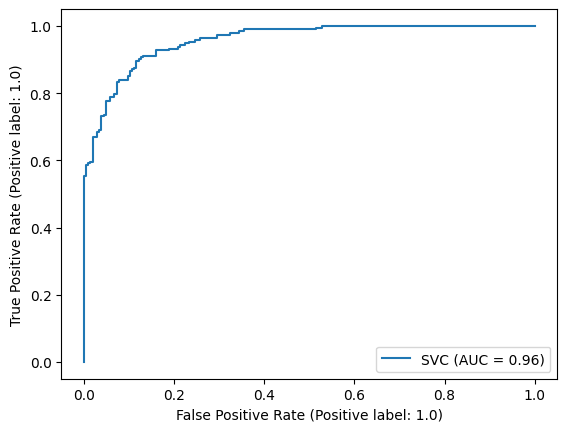

Curva Precision-Recall:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


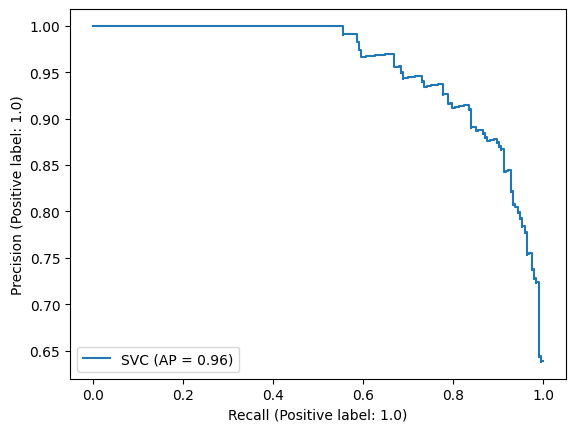

In [12]:
# Métricas SVM
yPSVC = SVC_F.predict(xtest)
ycSVC = np.c_[yPSVC, ytest]
acc_SVC = np.sum(ycSVC[:, 0] == ycSVC[:, 1])/ycSVC.shape[0]
rev_SVC = np.sum(ycSVC[ycSVC[:, 1] == 1, 0] == ycSVC[ycSVC[:, 1] == 1, 1])/ycSVC[ycSVC[:, 1] == 1].shape[0]
pre_SVC = np.sum(ycSVC[ycSVC[:, 0] == 1, 0] == ycSVC[ycSVC[:, 0] == 1, 1])/ycSVC[ycSVC[:, 0] == 1].shape[0]
f1_SVC = 2*np.sum(ycSVC[ycSVC[:,1] == 1, 0] == ycSVC[ycSVC[:, 1] == 1, 1])/(2*np.sum(ycSVC[ycSVC[:,1] == 1, 0] == ycSVC[ycSVC[:, 1] == 1, 1]) + np.sum(ycSVC[:, 0] != ycSVC[:, 1]))
print("Métricas SVM:")
print(f"Acurácia: {acc_SVC}")
print(f"Revocação: {rev_SVC}")
print(f"Precisão: {pre_SVC}")
print(f"F1-Score: {f1_SVC}")
print("Curva ROC:")
metrics.plot_roc_curve(SVC_F, xtest, ytest)
plt.show()
print("Curva Precision-Recall:")
metrics.plot_precision_recall_curve(SVC_F, xtest, ytest)
plt.show()

Métricas RFC:
Acurácia: 0.8696741854636592
Revocação: 0.8549222797927462
Precisão: 0.873015873015873
F1-Score: 0.8638743455497382
Curva ROC:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


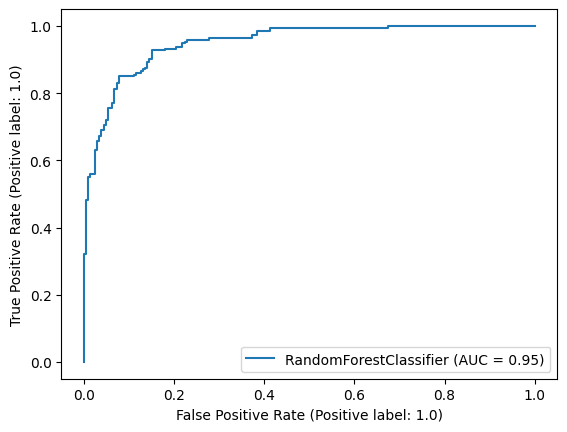

Curva Precision-Recall:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


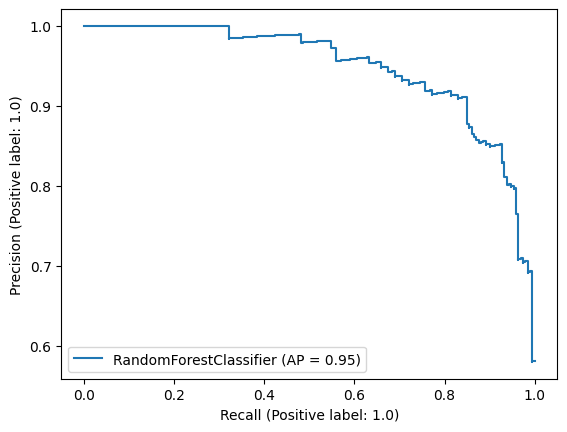

In [13]:
# Métricas RFC
yPRFC = RFC_F.predict(xtest)
ycRFC = np.c_[yPRFC, ytest]
acc_RFC = np.sum(ycRFC[:, 0] == ycRFC[:, 1])/ycRFC.shape[0]
rev_RFC = np.sum(ycRFC[ycRFC[:, 1] == 1, 0] == ycRFC[ycRFC[:, 1] == 1, 1])/ycRFC[ycRFC[:, 1] == 1].shape[0]
pre_RFC = np.sum(ycRFC[ycRFC[:, 0] == 1, 0] == ycRFC[ycRFC[:, 0] == 1, 1])/ycRFC[ycRFC[:, 0] == 1].shape[0]
f1_RFC = 2*np.sum(ycRFC[ycRFC[:,1] == 1, 0] == ycRFC[ycRFC[:, 1] == 1, 1])/(2*np.sum(ycRFC[ycRFC[:,1] == 1, 0] == ycRFC[ycRFC[:, 1] == 1, 1]) + np.sum(ycRFC[:, 0] != ycRFC[:, 1]))
print("Métricas RFC:")
print(f"Acurácia: {acc_RFC}")
print(f"Revocação: {rev_RFC}")
print(f"Precisão: {pre_RFC}")
print(f"F1-Score: {f1_RFC}")
print("Curva ROC:")
metrics.plot_roc_curve(RFC_F, xtest, ytest)
plt.show()
print("Curva Precision-Recall:")
metrics.plot_precision_recall_curve(RFC_F, xtest, ytest)
plt.show()